In [266]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import geopandas as gpd      # Para manejar datos geoespaciales y graficar
import contextily as ctx     # Para agregar fondos de mapa (tiles)
import seaborn as sns

# Paso 1: Carga del conjunto de datos

In [267]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv", sep=",")

In [268]:
df = df.drop_duplicates()

In [269]:
df = df[["Longitude", "Latitude", "MedInc"]]
df.head()

,Longitude,Latitude,MedInc
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


convertir los datos a una misma esscala usando min-max para poder usar el algoritmo de kmins

In [270]:
min_max_scaler = MinMaxScaler()  # Instancia de: from sklearn.preprocessing import MinMaxScaler

num_variables = ["Longitude", "Latitude", "MedInc"]
min_max_features = min_max_scaler.fit_transform(df[num_variables])
min_max_features = min_max_scaler.transform(df[num_variables])

df_scaled = pd.DataFrame(
                            min_max_features,
                            index=df.index,
                            columns=num_variables)

In [271]:
df_scaled

,Longitude,Latitude,MedInc
0,0.211155,0.567481,0.539668
1,0.212151,0.565356,0.538027
2,0.210159,0.564293,0.466028
3,0.209163,0.564293,0.354699
4,0.209163,0.564293,0.230776
...,...,...,...
20635,0.324701,0.737513,0.073130
20636,0.312749,0.738576,0.141853
20637,0.311753,0.732200,0.082764
20638,0.301793,0.732200,0.094295


# Paso 2: Construye un K-Means

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

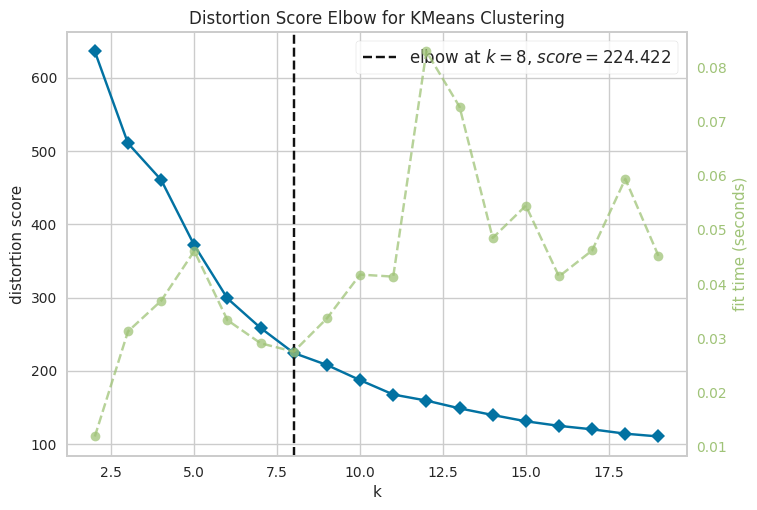

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [272]:
elbow_vis = KElbowVisualizer(KMeans(random_state=18), k=(2, 20))
elbow_vis.fit(df_scaled)
elbow_vis.show()

el uso del metodo del codo nos sugiere que el numero mas eficiente para la eleccion de cluster seria el 8, pero para usos del ejercicio practico usaremos el 6

In [273]:
# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(df_scaled)

# Realizar predicciones con datos nuevos
# model.labels_ nos regresa los cluster asignado para todo el  dataset
labels = model.labels_

cluster = labels          #model.predict(df_scaled)
df["cluster"]=cluster
df_scaled["cluster"]=cluster
df.head()

,Longitude,Latitude,MedInc,cluster
0,-122.23,37.88,8.3252,4
1,-122.22,37.86,8.3014,4
2,-122.24,37.85,7.2574,4
3,-122.25,37.85,5.6431,4
4,-122.25,37.85,3.8462,1


In [274]:
#Los centroides de los clusters : Son los “promedios” de cada grupo.
centroids = model.cluster_centers_
centroids

array([[0.64838801, 0.13568155, 0.17915523],
       [0.25422831, 0.57330871, 0.18797396],
       [0.46385977, 0.37177197, 0.15741452],
       [0.62636118, 0.14101421, 0.41236668],
       [0.23253733, 0.54360013, 0.41414886],
       [0.19385084, 0.79277599, 0.13105498]])

Comprension de nuestro nuevo dataset agregando cluster

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

(np.float64(-13898461.064521791),
 np.float64(-12669048.60820088),
 np.float64(3768450.223789852),
 np.float64(5219447.026721441))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

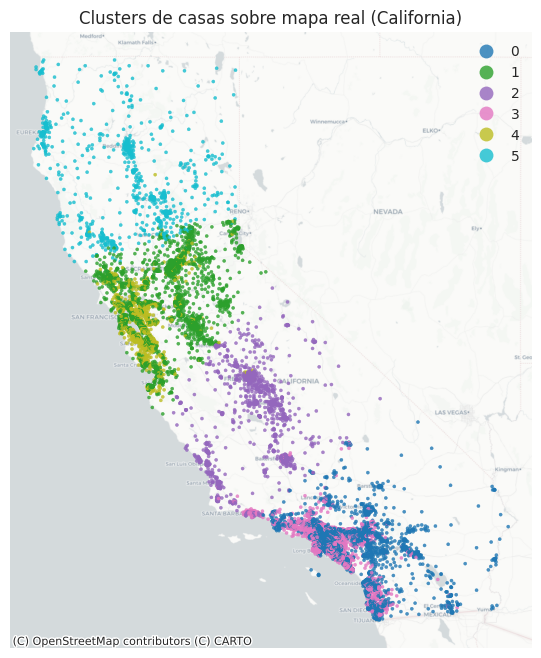

In [275]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs='EPSG:4326')
# Convertimos a proyección métrica para agregar fondo de mapa 
gdf = gdf.to_crs(epsg=3857) 
# Graficamos por cluster
ax = gdf.plot(figsize=(10, 8), column='cluster', categorical=True, legend=True, cmap='tab10', markersize=5, alpha=0.8)
# Agregamos fondo de mapa 
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.title("Clusters de casas sobre mapa real (California)")
plt.axis('off')

analisis de cada cluster

Esto muestra el perfil promedio de cada cluster, indicando el ingreso promedio de cada cluster

In [276]:
df.groupby("cluster").mean()

,Longitude,Latitude,MedInc
cluster,,,
0,-117.840178,33.816770,3.097477
1,-121.796889,37.935571,3.222629
2,-119.692848,36.038374,2.782442
3,-118.061276,33.866908,6.478737
4,-122.016159,37.655841,6.497119
5,-122.404829,40.002110,2.398754


In [277]:
# otra forma de hacer el mapeo sin usar mapas
# gdf["cluster"] = model.labels_
#gdf.plot(column="cluster", categorical=True)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

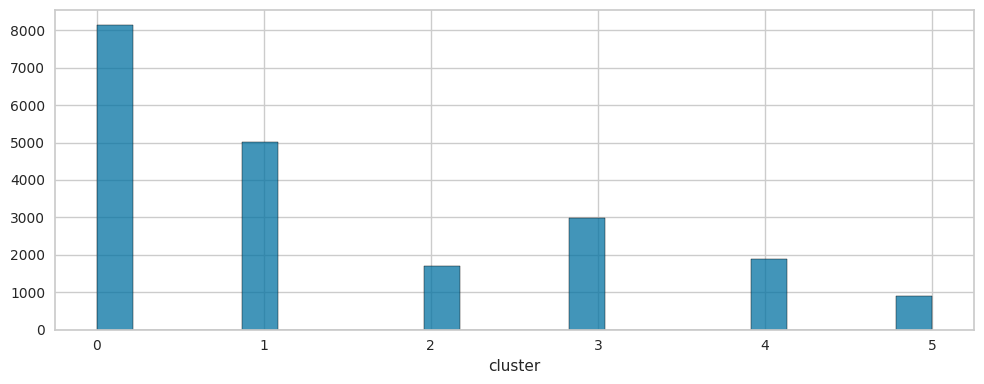

In [278]:
fig, axis = plt.subplots( figsize=(10, 4))
sns.histplot(data=df, x="cluster").set(ylabel=None)

plt.tight_layout()
plt.show()

In [279]:
df.groupby("cluster").mean()

,Longitude,Latitude,MedInc
cluster,,,
0,-117.840178,33.816770,3.097477
1,-121.796889,37.935571,3.222629
2,-119.692848,36.038374,2.782442
3,-118.061276,33.866908,6.478737
4,-122.016159,37.655841,6.497119
5,-122.404829,40.002110,2.398754


aqui podemos  observar la  cantidad de casas asignadas a cada clutes y haciendo una comparacion entre las ultimas 3 graficas podemos obtener lo siguiente:

cada cluster indica  el precio promedio de ingresos segun la region asi tenemos que:

0 indica que se encuentra en la region con centroide en -117.840178	33.816770 de longitud y latitud y tiene un ingreso promedio de 3.09
es la region con mas conteos

1 indica que se encuentra en la region con centroide en -121.796889	37.935571 de longitud y latitud tiene un ingreso promedio de 3.22

2 indica que se encuentra en la region con centroide en -119.692848	36.038374de longitud y latitud  y tiene un ingreso promedio de 2,78

3 indica que se encuentra en la region con centroide en -118.061276	33.866908 de longitud y latitud tiene un ingreso promedio de 6.47

4 indica que se encuentra en la region con centroide en -122.016159	37.655841 de longitud y latitud y tiene un ingreso promedio de 6.49

5 indica que se encuentra en la region con centroide en -122.404829	40.002110 de longitud y latitud  y tiene un ingreso promedio de 2.39 es la region con menos conteos

region con promedio de ingresos bajos: cluster con indicador 5 y 2. (menores a 3)

region con promedio de ingresos medios: cluster con indicador 0 y 1. (entre 3 y 6)

region con promedio de ingresos altos: cluster con indicador 3  y 4 (mayores a 6)


# Paso 4: Entrena un modelo de clasificación supervisada 


ahora dividimos el conjunto en entrenamiento y prueba

In [280]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["cluster"], axis=1)
y = df["cluster"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

hacemos  uso de los modelos de ramdon-forest, para el uso de modelo de arboles no es necesario usar los datos escalados o normalizados, por tal motivo pueden usarse cualquiera  de los dataframes, df o df_scaled

In [281]:
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


prediccion del modelo

In [282]:
y_pred_test_rf = model_rf.predict(X_test)
y_pred_train_rf = model_rf.predict(X_train)
accuracy_score(y_test, y_pred_test_rf), accuracy_score(y_train, y_pred_train_rf)

(0.9951550387596899, 1.0)

haciendo uso de los modelos de boosting para hacer comparaciones

In [283]:
xgb = XGBClassifier(n_estimators=50,
                    learning_rate=0.1,
                    random_state=18,
                    use_label_encoder=False,
                    eval_metric='mlogloss')
ada = AdaBoostClassifier(n_estimators=200,
                         learning_rate=0.1,
                         random_state=18)
gb = GradientBoostingClassifier(n_estimators=50,
                                learning_rate=0.1,
                                random_state=18)
lgb = LGBMClassifier(n_estimators=50,
                     learning_rate=0.1,
                     random_state=18)

entrenamiento de cada uno de los modelos

In [284]:
xgb.fit(X_train, y_train)
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)
lgb.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [12:14:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 3
[LightGBM] [Info] Start training from score -0.930902
[LightGBM] [Info] Start training from score -1.413552
[LightGBM] [Info] Start training from score -2.502502
[LightGBM] [Info] Start training from score -1.923631
[LightGBM] [Info] Start training from score -2.388012
[LightGBM] [Info] Start training from score -3.152227
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,50
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [285]:
# predicción
ada_y_pred_test = ada.predict(X_test)
gb_y_pred_test = gb.predict(X_test)
xgb_y_pred_test = xgb.predict(X_test)
lgb_y_pred_test = lgb.predict(X_test)

ada_y_pred_train = ada.predict(X_train)
gb_y_pred_train = gb.predict(X_train)
xgb_y_pred_train = xgb.predict(X_train)
lgb_y_pred_train = lgb.predict(X_train)

In [286]:
accuracy_train = (accuracy_score(y_train, ada_y_pred_train),
                  accuracy_score(y_train, gb_y_pred_train),
                  accuracy_score(y_train, xgb_y_pred_train),
                  accuracy_score(y_train, lgb_y_pred_train),
                  accuracy_score(y_train, y_pred_train_rf))
accuracy_test = (accuracy_score(y_test, ada_y_pred_test),
                 accuracy_score(y_test, gb_y_pred_test),
                 accuracy_score(y_test, xgb_y_pred_test),
                 accuracy_score(y_test, lgb_y_pred_test),
                 accuracy_score(y_test, y_pred_test_rf))

accuracy = pd.DataFrame(data=[accuracy_train, accuracy_test],
                        columns=['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM','RandomFores'],
                        index=['Train set', 'Test set'])

accuracy

,AdaBoost,Gradient Boosting,XGBoost,LightGBM,RandomFores
Train set,0.842599,0.998244,0.998668,1.000000,1.000000
Test set,0.840359,0.993217,0.995397,0.995882,0.995155


podemos observar que todos los modelos nos arrojan valores muy altos de test y train excepto el modelo de adaBoost que nos da un valor de un poco menos del  85%